In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



### Data

In [55]:
from data_preprocessing import DataPreprocessing

data_preprocessing = DataPreprocessing('../dataset/train.csv')
data_preprocessing.load_data()

data_preprocessing.drop_columns(['ID','Customer_ID','Name','SSN','Month','Credit_History_Age','Type_of_Loan'])

data_preprocessing.correct_columns_type()

data_preprocessing.correct_data()

df=data_preprocessing.get_data()

d:\Big-Data-Project\src\data_preprocessing.py:15: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.data_path)


Progress: 100000/100000

In [83]:
categorical_cols = ['Occupation','Credit_Mix','Payment_of_Min_Amount', 'Payment_Behaviour']

# Columns to leave unchanged (same as used during training)
continuous_cols = [ 'Age',
'Annual_Income',
'Monthly_Inhand_Salary', 
'Num_Bank_Accounts',
'Num_Credit_Card',
'Interest_Rate',
'Num_of_Loan',
'Delay_from_due_date',
'Num_of_Delayed_Payment',
'Changed_Credit_Limit',
'Num_Credit_Inquiries',
'Outstanding_Debt',
'Credit_Utilization_Ratio',
'Total_EMI_per_month',
'Amount_invested_monthly',
'Monthly_Balance']

### Utils

In [89]:
def draw_histogram(df, key):
    unique_values = np.unique(df[key])
    num_bins = len(unique_values)

    # Set up a color map for the categories
    color_map = plt.cm.get_cmap('tab10', num_bins)

    # Plot each category separately with a unique color
    for i, value in enumerate(unique_values):
        category_data = df[df[key] == value][key]
        plt.hist(category_data, bins=np.arange(num_bins + 1) - 0.5, width=0.8, align='mid', color=color_map(i), label=str(value), alpha=0.7)


    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {key}')
    
    # Add a legend
    plt.legend(title=key, title_fontsize='large', fontsize='medium', loc='upper right')

    plt.show()


def draw_count_plot(df, key):
    sns.countplot(data=df, x=key,hue='Credit_Score')
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.title(f'Count plot of {key}')
    plt.show()



# def draw_box_plot(df, key):
#     sns.boxplot(data=df, x='Credit_Score', y=key)
#     plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
#     plt.title(f'Box plot of {key}')
#     plt.show()


# continuous features 
def draw_continuous_features_distribution(df,feature_name):
    # Calculate number of bins using Surges' rule
    num_bins = int(np.ceil(np.log2(len(df[feature_name])) + 1))
    # Plotting the distribution of a feature using Seaborn
    sns.histplot(df[feature_name], bins=num_bins, kde=True, color='skyblue')
    plt.xlabel('Feature Value')
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature_name}')


def draw_continuous_features_KDE (df,feature_name):
    '''
    Draw the Kernel Density Estimate (KDE) plot of a continuous feature in the dataset
    '''
    # Plotting the distribution of a feature using Seaborn
    sns.kdeplot(data=df, x=feature_name, hue='Credit_Score', fill=True, common_norm=False, palette='husl')
    # plot mean values
    mean_values = df.groupby('Credit_Score')[feature_name].mean()
    colors = sns.color_palette('husl', n_colors=len(mean_values))  # 

    for credit_score, mean_value in mean_values.items():
        # Get the corresponding color from the palette
        color = colors[df['Credit_Score'].unique().tolist().index(credit_score)]
        plt.axvline(mean_value, color=color, linestyle='--', label=f'Mean {credit_score}: {mean_value:.2f}')
        

    plt.legend(title='Credit Score')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.title(f'KDE Plot of {feature_name} by Credit Score')
    

def draw_continuous_feature(df,feature_name):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    draw_continuous_features_distribution(df, feature_name)

    plt.subplot(1, 2, 2)
    draw_continuous_features_KDE(df, feature_name)

    plt.tight_layout()
    plt.show()



def draw_continuous_features_correlation_matrix(df):
    # create correlation matrix for numerical features
    corr = df[continuous_cols].corr()
    # plot the correlation matrix
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()






### Features Analysis

#### Categorical Features

##### 1. Occupation

Represents the occupation of the person it is the type of job or profession that the individual is engaged in

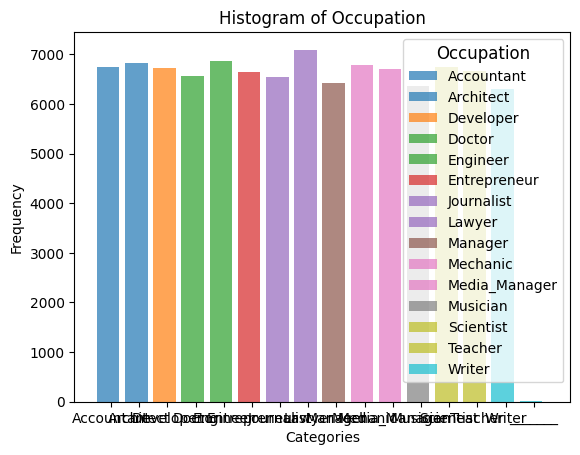

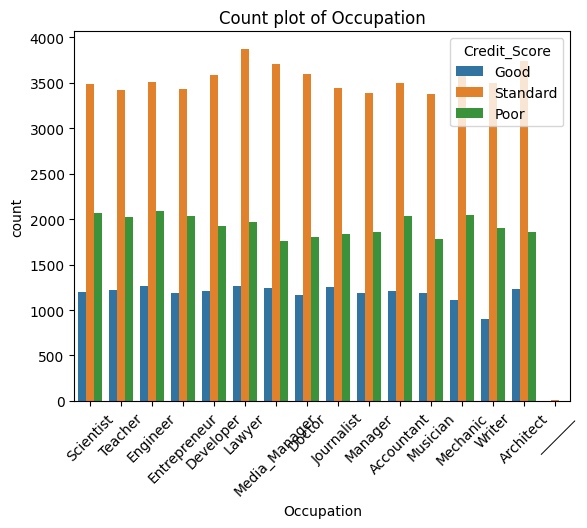

In [49]:
# Histogram of the 'Occupation' column
draw_histogram(df=df, key='Occupation')
# Count plot of the 'Occupation' column 
draw_count_plot(df=df, key='Occupation')


##### 💭💭 Same Distribution of credit Score across different occupation groups ==> occupation isn't an effective feature No need to consider occupation in the model    

##### 2. Credit_Mix

Credit Mix presents the quality or classification of the mix of credits rather. It seems to be categorizing the overall quality or rating of the credit mix for each individual 
1. Good: This category likely represents a credit mix that is considered favorable or high-quality. It may include a diverse range of credit types with a history of on-time payments, low credit utilization, and a healthy credit score. A "good" credit mix indicates responsible credit management and may lead to better terms on future credit applications.

2. Standard: The "standard" category suggests an average or moderate-quality credit mix. It may include a mix of credit types with varying payment histories and credit utilization.

3. Poor: This category represents a credit mix that is considered low-quality or risky. It may include a limited variety of credit types, high levels of debt or utilization, frequent late payments, defaults, or other negative credit events. A "poor" credit mix can signal financial instability and may result in difficulty obtaining credit or being offered unfavorable terms.

In [ ]:
# Histogram of the 'Occupation' column
draw_histogram(df=df, key='Occupation')
# Count plot of the 'Occupation' column 
draw_count_plot(df=df, key='Occupation')

##### 💭💭

##### x. xxxxxx

##### 💭💭

#### Numerical Features

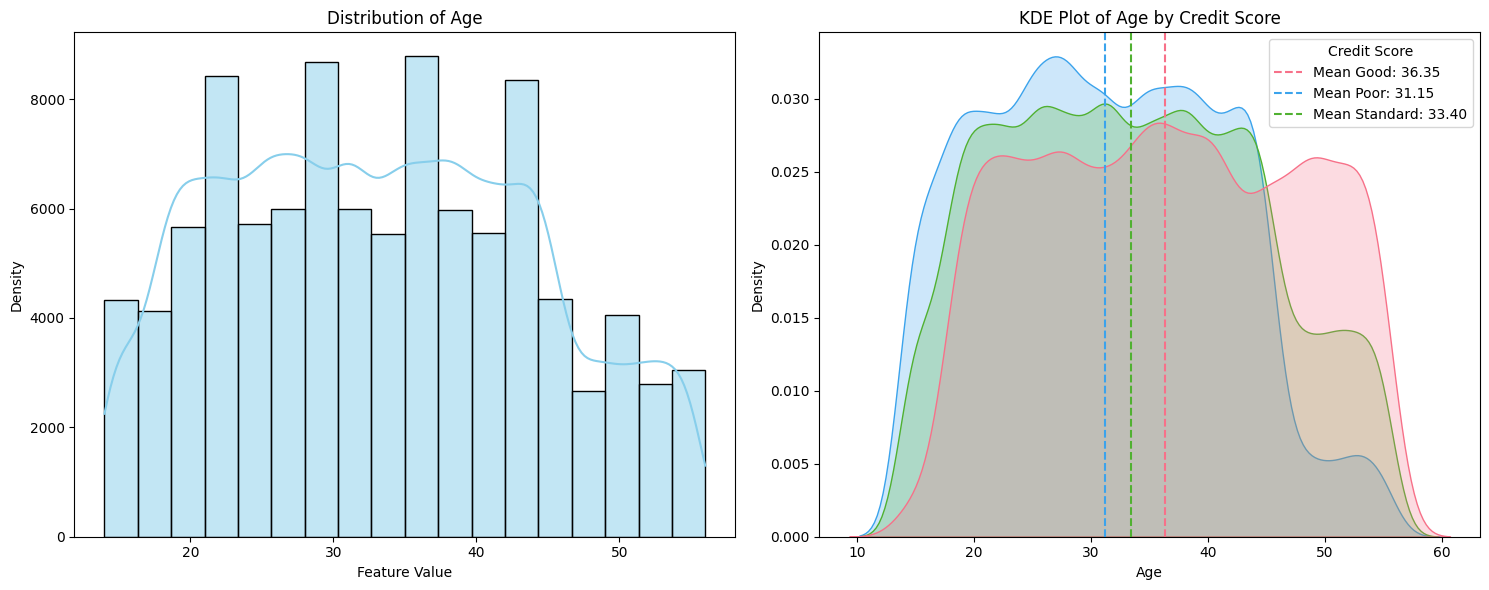

💭💭


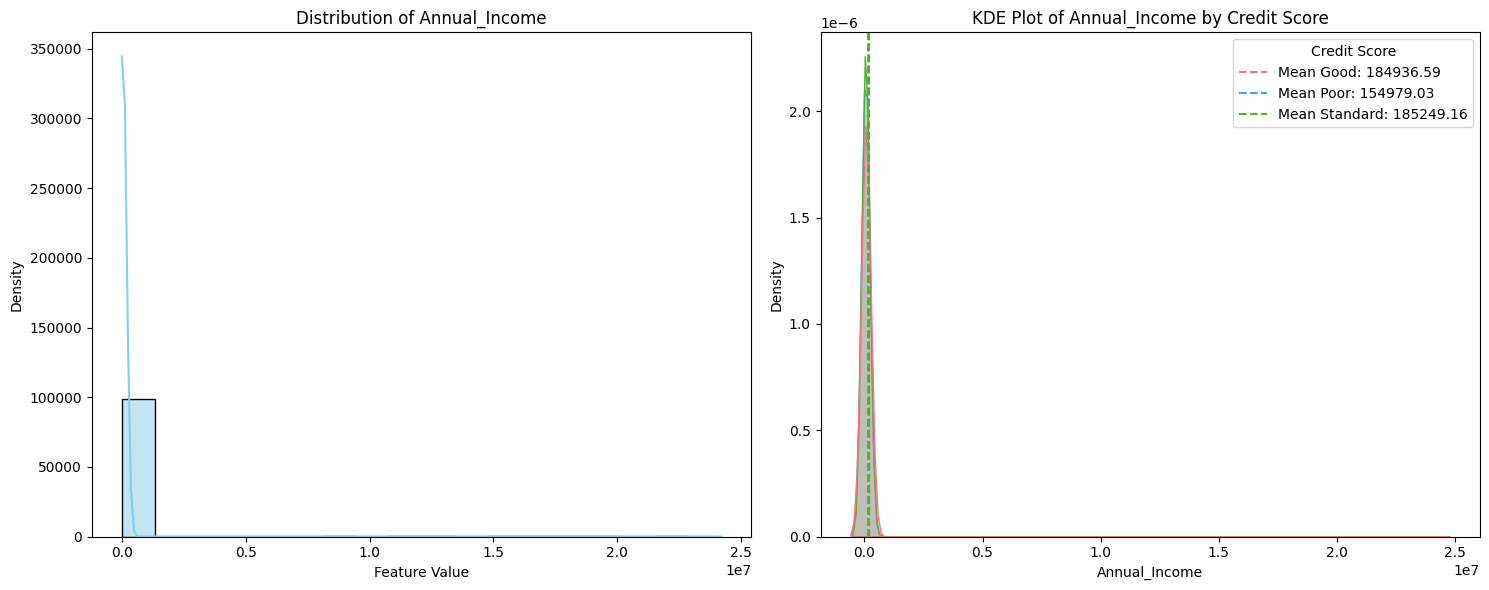

💭💭


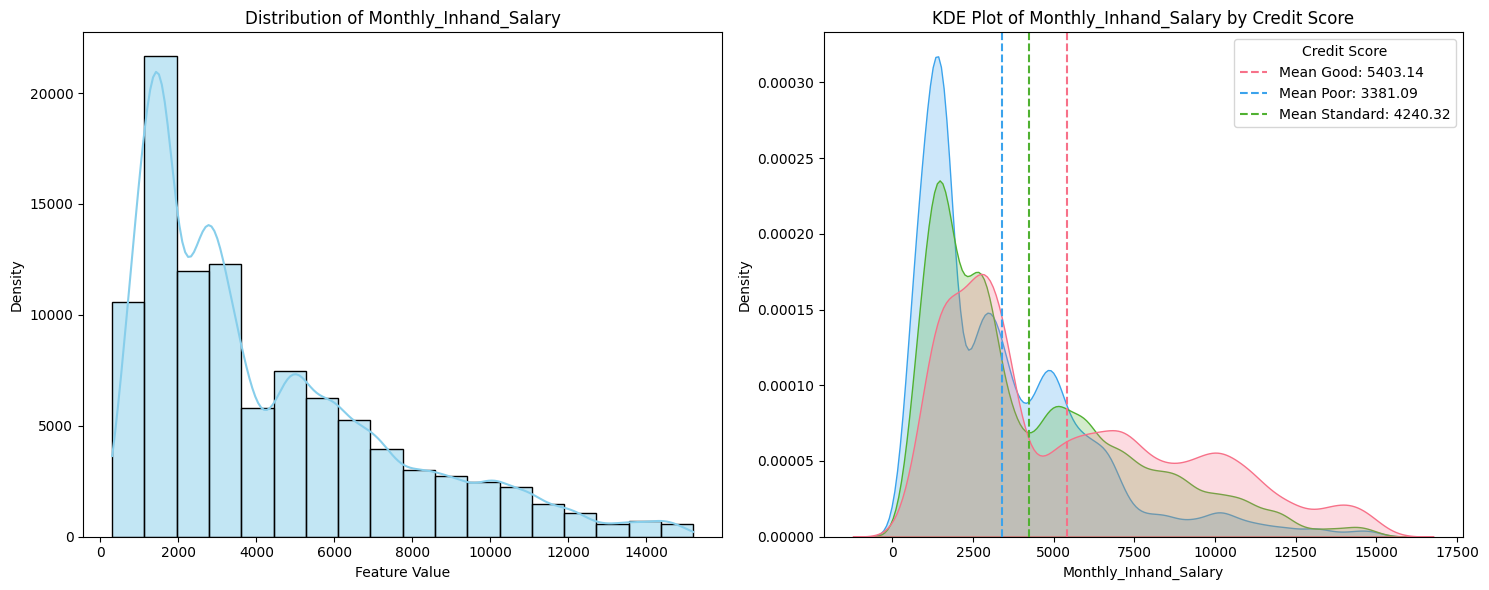

💭💭


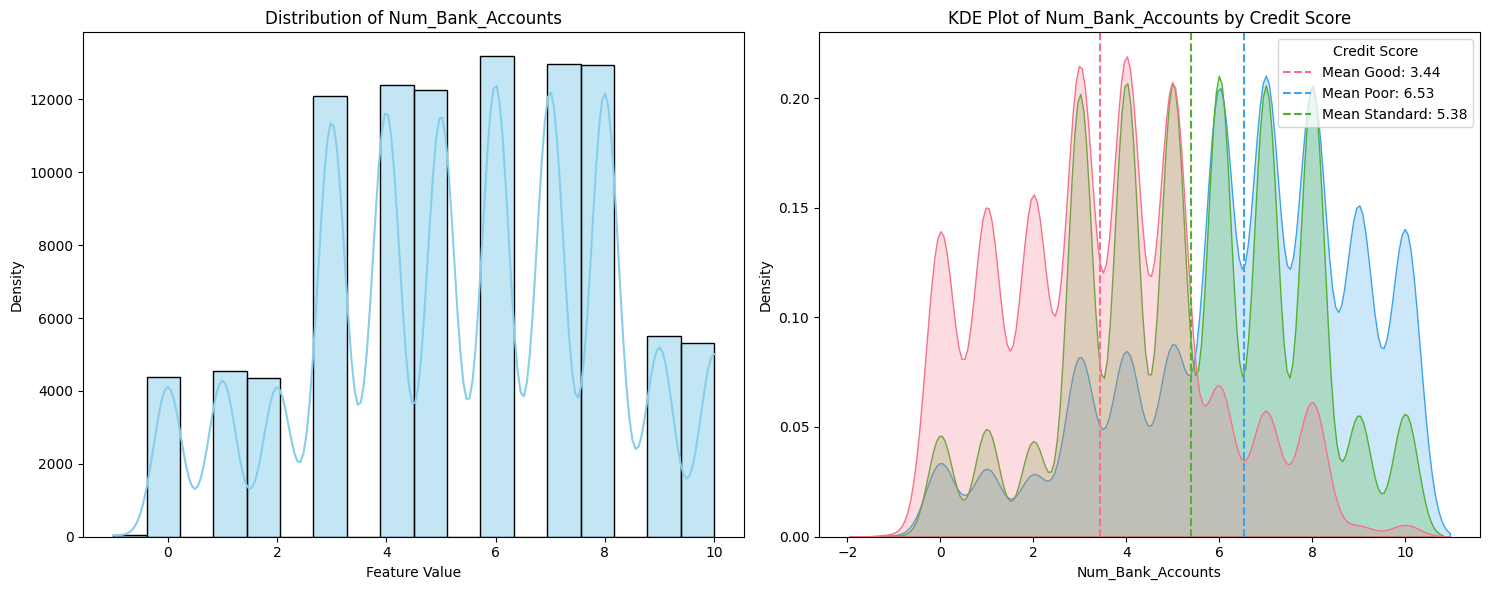

💭💭


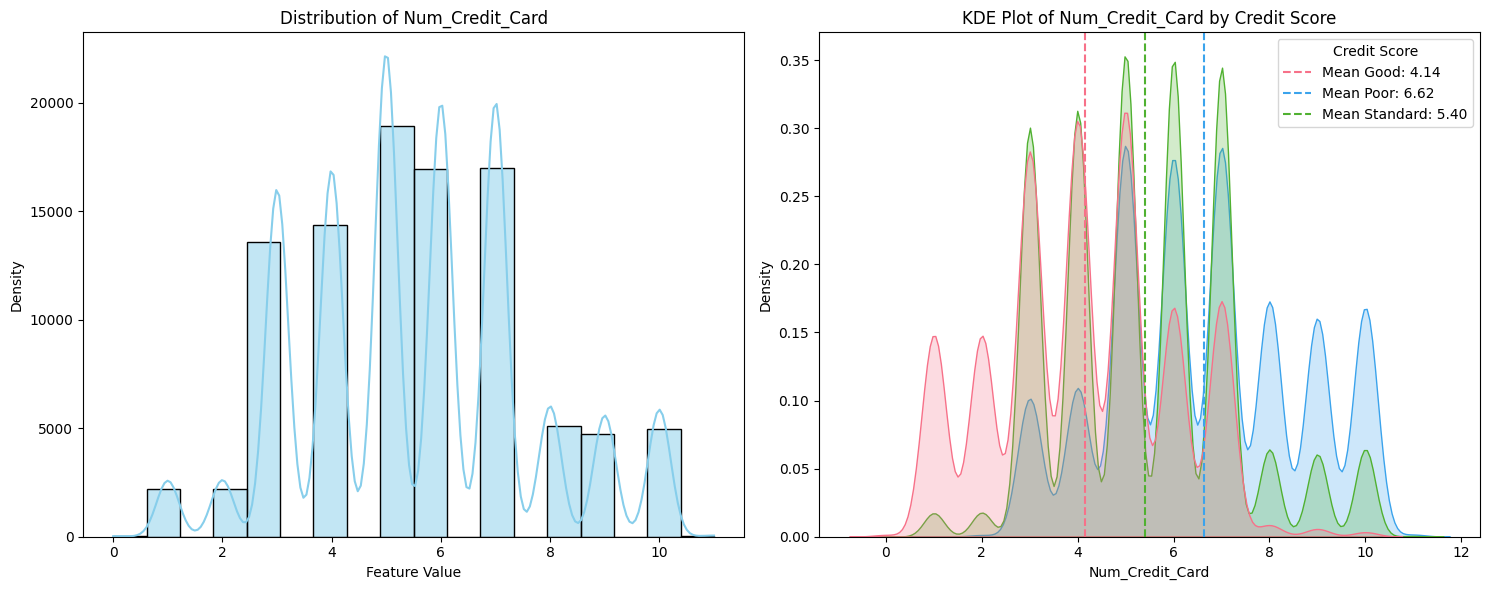

💭💭


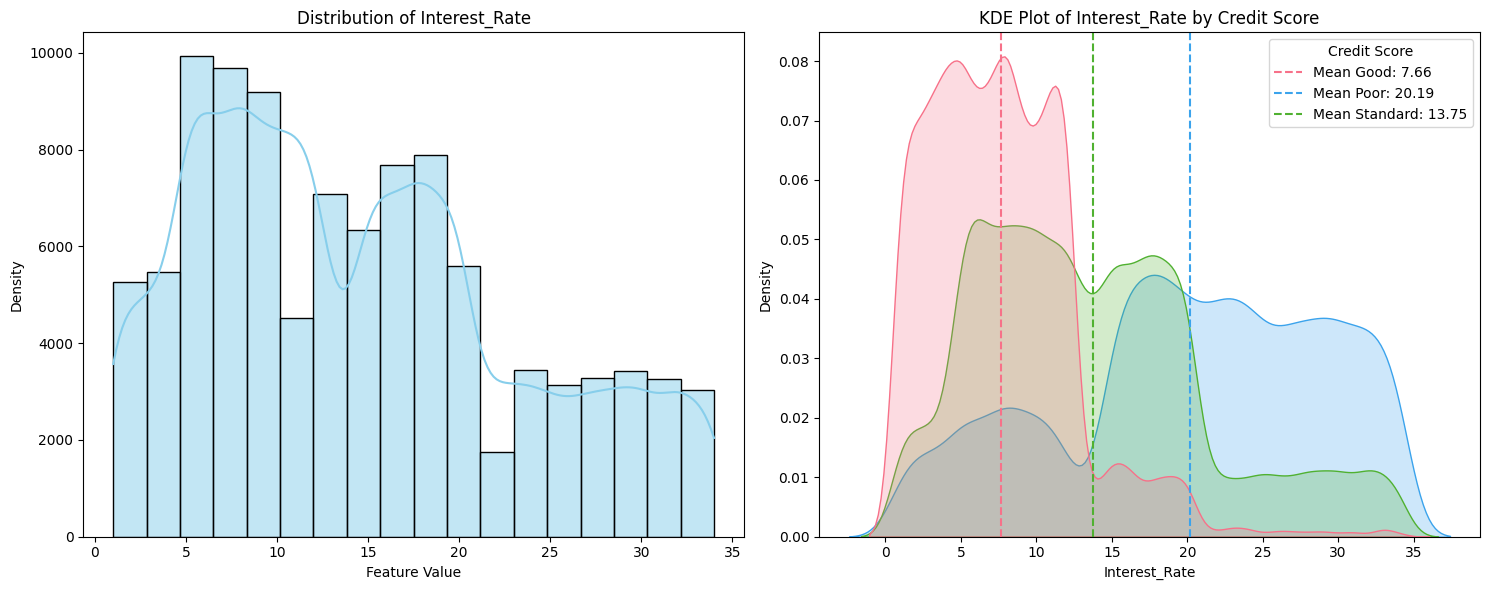

💭💭


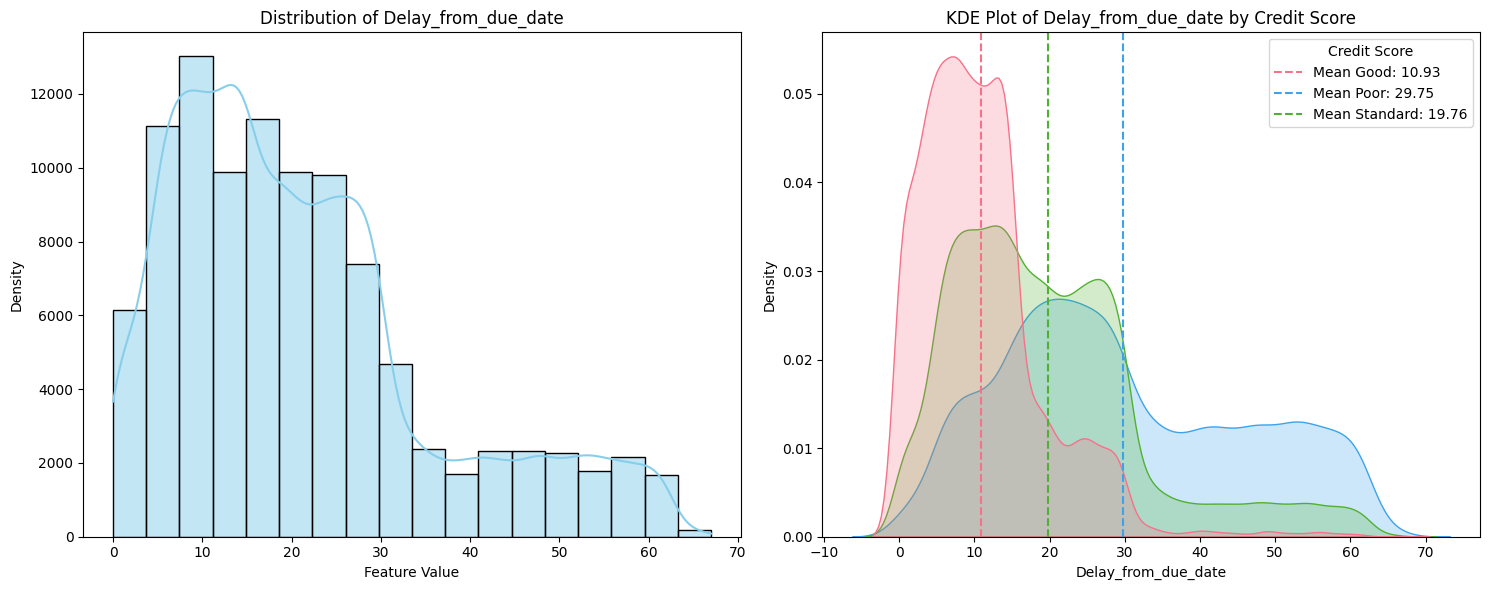

💭💭


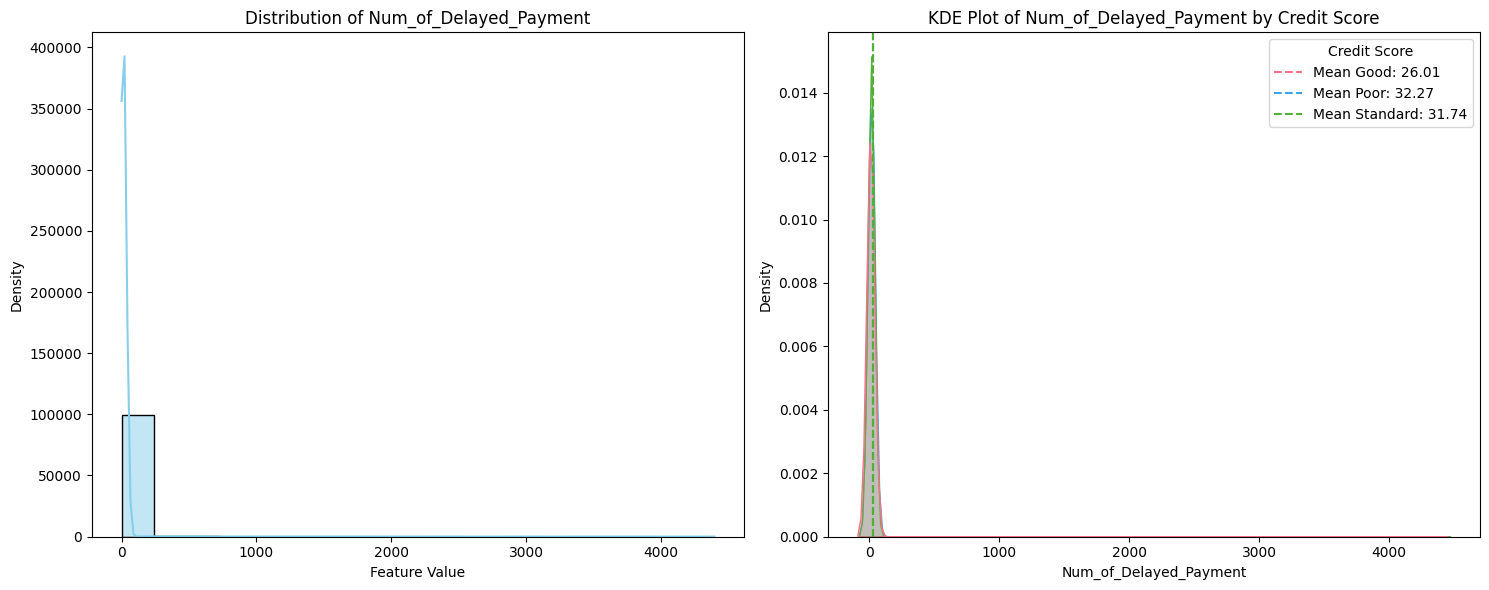

💭💭


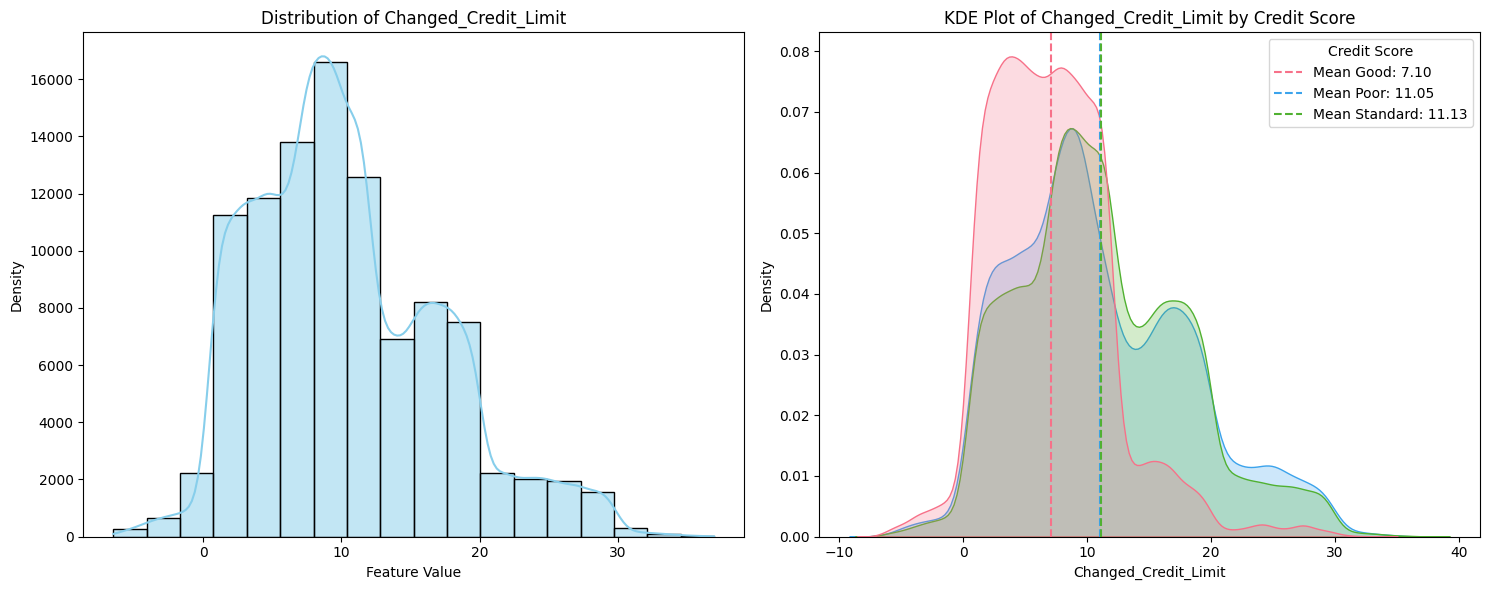

💭💭


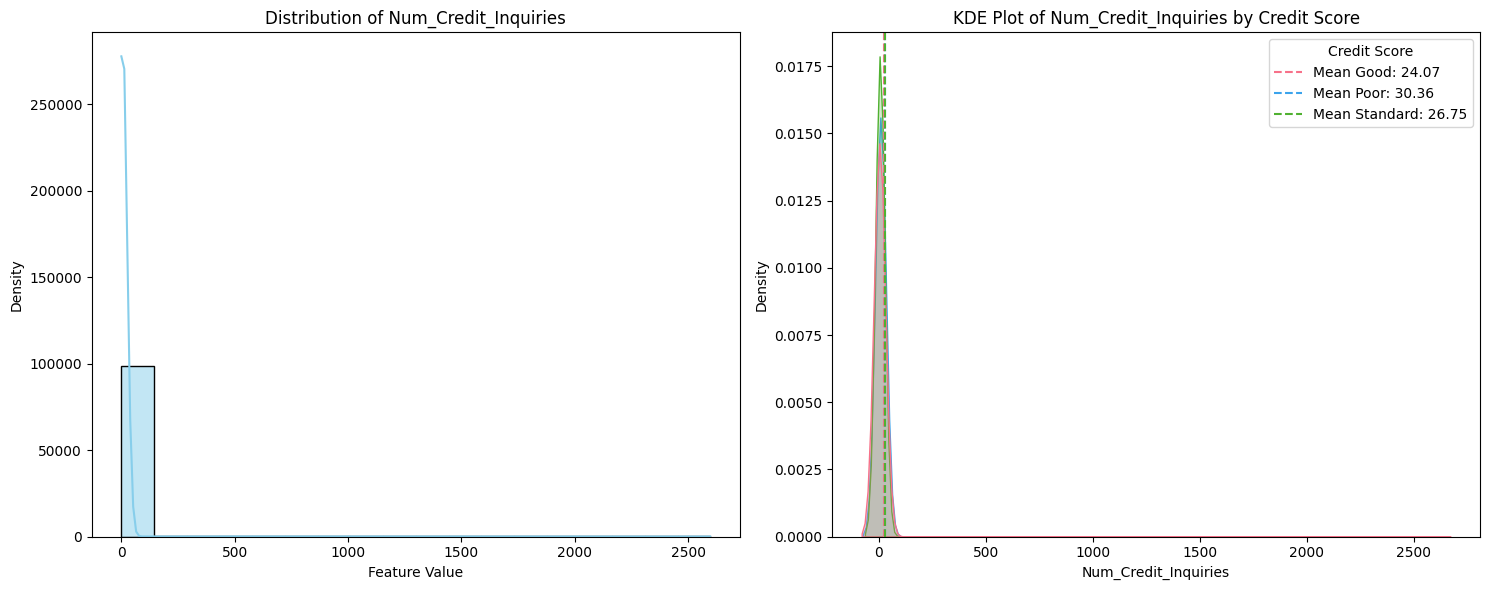

💭💭


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

In [109]:
continuous_features = {
    'Age': {"comment": "💭💭"},
    'Annual_Income': {"comment": "💭💭"},
    'Monthly_Inhand_Salary': {"comment": "💭💭"},
    'Num_Bank_Accounts': {"comment": "💭💭"},
    'Num_Credit_Card': {"comment": "💭💭"},
    'Interest_Rate': {"comment": "💭💭"},
    # 'Num_of_Loan': {"comment": "💭💭"},
    'Delay_from_due_date': {"comment": "💭💭"},
    'Num_of_Delayed_Payment': {"comment": "💭💭"},
    'Changed_Credit_Limit': {"comment": "💭💭"},
    'Num_Credit_Inquiries': {"comment": "💭💭"},
    'Outstanding_Debt': {"comment": "💭💭"},
    'Credit_Utilization_Ratio': {"comment": "💭💭"},
    'Total_EMI_per_month': {"comment": "💭💭"},
    'Amount_invested_monthly': {"comment": "💭💭"},
    'Monthly_Balance': {"comment": "💭💭"}
}

# Loop over the keys in the dictionary
for key,value in continuous_features.items():
    draw_continuous_feature(df,feature_name=key)
    print(value["comment"])

##### 1. Age

In [103]:
# print("1.Age")
# draw_continuous_features_distribution(df, feature_name='Age')
# draw_continuous_features_KDE(df, feature_name='Age')
print(continuous_features.keys())

# for feature in continuous_features.keys():
#     print(feature)
# draw_continuous_feature(df=df,feature_name="Age")
# print(continuous_features['Age'])

dict_keys(['Age'])


##### 💭💭

##### . Interest Rate

The interest rate on a credit card, often referred to as the Annual Percentage Rate (APR), is the rate at which the credit card issuer charges interest on any outstanding balance.

##### Correlation Analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_21484\2703600386.py:75: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[continuous_cols].corr()


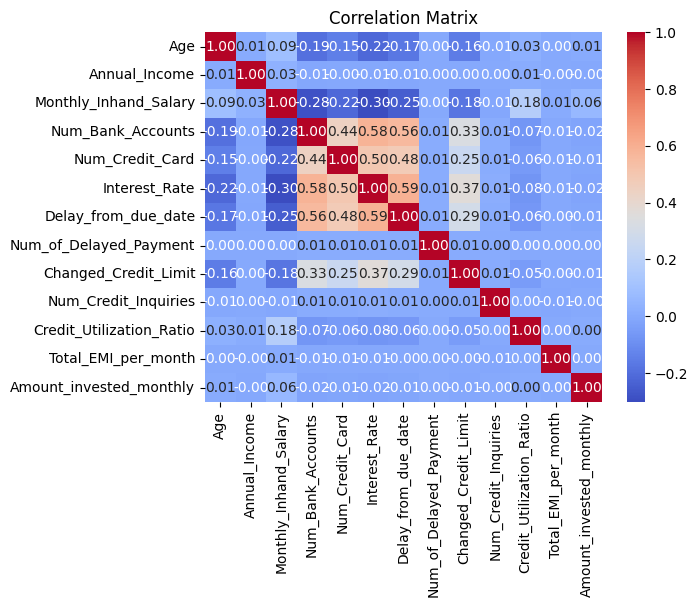

In [84]:
draw_continuous_features_correlation_matrix(df)

From the graph it is clear that num_of_bank_accounts, num_of_credit_cards , interest_rate and delay_from_due_date are the most features correlated with each other than other features.

. Num of Banks accounts and num of credit cards are correlated with each other which is logic as no of accounts are more the customer will have more credit cards [0.44] 😉
. Num of Banks accounts and Interest Rate are correlated with each other  [0.58] ***

. Num of Credit Cards and Interest Rate are correlated the more cards the person has the more outstanding balanced he will be outstanding so the interest rate increases[0.50]

. Num of Banks accounts & Num of Credit Cards both are correlated with Delay From Due Date are as no of bank accounts/credit cards increases the outstanding balance increase so the customer is more likely to miss the due date  [0.56] [0.48]

. Interest Rate and Delay From Due Date are correlated with each other as the delay from due date increases the bank needs to apply like a penalty so as a result the interest rate increases [0.59]